In [2]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

[[255 255 255 108   3   0  20 247 255 247 255 242 255 255 252 251 255 254
  252 254]
 [255 241 255 250  19   2  11  76 255 255 246 255 255 248 255 253 255 255
  255 252]
 [235 255 239 255 162   0   0   0 205 236 255 244 252 255 238 255 255 255
  255 253]
 [255 255 255 246 244  40   9   8  61 255 233 255 247 255 250 255 242 249
  255 255]
 [255 241 255 249 255 198   0   8   0 150 252 255 255 237 255 247 255 255
  254 249]
 [244 255 245 246 255 255  77   0   9   0 244 245 255 255 247 255 238 242
  252 255]
 [255 252 243 255 249 240 255  12   3   0  67 255 227 255 254 255 255 255
  255 240]
 [253 253 255 241 255 255 255 115   6   0   8 144 255 248 255 254 255 206
  126  50]
 [251 251 252 255 255 255 255 247  66   0   0  14 232 255 232 153  65   0
    3   0]
 [255 255 255 250 240 250 255 255 238  20   4   0  28  66   5   0   0   0
    0   4]
 [247 236 242 255 255 249 246 255 241 136   7  11  20   0   4   7   0  57
  131 206]
 [248 255 255 244 249 255 210 126  57   0   0   0   0   2  28  99

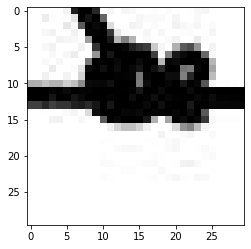

In [19]:
filename = 'tests/001.jpg'
threshold = 0.1
img = cv2.imread(filename, 0)
edges = cv2.Canny(img,100,200)
rows = img.shape[0]
cols = img.shape[1]

plt.imshow(img[520:550, 470:500], cmap='gray')
print(img[320:340, 360:380])
plt.show()


In [4]:
# MinMax Scaler
def minmaxScaler(image):
    minPixel = np.amin(image)
    maxPixel = np.amax(image)
    image = (image - minPixel) / (maxPixel - minPixel)
    return image

img = minmaxScaler(img)
# print(img[190:210, 290:305])
edges = minmaxScaler(edges)
# minPixelEdges = np.amin(edges)
# maxPixelEdges = np.amax(edges)
# edges = (edges - minPixelEdges)/(maxPixelEdges - minPixelEdges)
print(img[520:550, 460:475])
print(edges[190:210, 290:305]) 
new_array = np.array(edges)


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.92941176 0.98823529 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.96862745 0.95686275 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         0.95686275]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.97254902 0.95686275 1.        ]
 [1.         1.         1.         1.         1.         1.
  1.

In [9]:
# Threshold Image
def thresholdImage(image, threshold):
    for i in range(len(image)):
        for j in range(len(image[i])):
            image[i][j] = int(image[i][j] <= threshold)
    return image

img = thresholdImage(img, threshold)
print(img[320:340, 360:380])
for i in range(len(img)):
    for j in range(len(img[i])):
        img[i][j] = (255 * img[i][j])

cv2.imwrite('tests/houghcircles001.jpg',img)

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


True

In [10]:
img = cv2.imread('tests/003.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('tests/003edges.png',edges)
lines = cv2.HoughLines(edges, 1, np.pi/180, 125)
print(len(lines))
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('tests/houghlines003.png',img)


29


True

In [11]:
img = cv2.imread('tests/dave.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('tests/houghlines5.jpg',img)

True

In [12]:
img = cv2.imread('tests/001.jpg', 0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,40,
                            param1=200,param2=75,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
print(len(circles))
counter = 0
for i in circles[0]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    counter += 1
print(counter)
cv2.imwrite('tests/houghcircles001.jpg',cimg)

1
1


True

In [13]:
visited = np.array([[False for i in range (cols)] for j in range (rows)])
print(visited.shape)

(684, 1037)


The original image at this location is: 
  [[  0  39 255 246 255 245 249 255 255 253 255 251 255 255 254 247 246 255
  255 255 255]
 [ 19   0 100 255 255 255 255 247 250 250 250 255 245 255 255 248 255 255
  255 255 255]
 [  0   9   1 220 255 255 243 246 255 251 255 255 242 248 251 246 255 250
  255 255 255]
 [  5   4   1  56 230 251 255 254 246 255 246 255 255 252 251 255 254 245
  255 255 255]
 [158   0   0  23 181 127 181 255 250 255 255 250 243 255 254 234 252 255
  255 255 255]
 [255  52   0   0   0   6  31  49  60 203 246 255 175  91  77 148 255 243
  255 255 255]
 [254 149   0  22   0   1   0   0   0  64 255 133  24  10   0   0 104 248
  255 255 255]
 [122   0   1   0   8   0   0  10   0   0 184   5  11   0   0   3   0 182
  255 255 255]
 [ 12   0  15   0  12   0   8  22   0  15  40   0   0 116 123   8   0 165
  255 255 255]
 [  0   0   0   0   2   3   6 120   5   0   0  13  12 128  41   0   0 188
  255 255 255]
 [ 10   8   7  16   0   0   0 123  13   0   0   7   0  23   0   7  

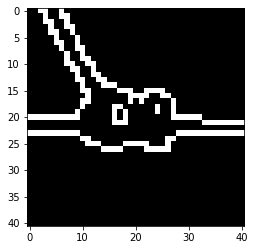

In [15]:
def line_width(filename, row, col):
    image = cv2.imread(filename, 0)
    edges = cv2.Canny(image, 100, 200)
    image = minmaxScaler(image)
    image = thresholdImage(image, threshold)
    edges = minmaxScaler(edges)
    
#     print(print_img[row - 5: row + 6, col - 5: col + 6])
#     print(edges[row - 1: row + 2, col - 1: col + 2])
#     print(edges[row - 10: row + 11, col - 10: col + 11])
#     print(np.array(edges).shape)
    if not edges[row][col]: 
        return -1
    max_width = max(rows, cols)
#     directions = [0 for i in range(4)]
    initial_loc = [-1 for i in range(4)]
    directions_stage = [0 for i in range(4)]
    final_widths = [2 * max_width for i in range(4)]
    for r in range(max_width):
        for i in [-1, 1]:
            if row + r * i >= 0 and row + r * i < rows:
                if edges[row + r * i][col]:
                    if directions_stage[i+1] == 0 or directions_stage[i+1] == 2:
                        directions_stage[i+1] += 1
                elif image[row + r * i][col]:
#                 elif image[row + r * i][col] <= threshold:
                    if directions_stage[i+1] == 1:
                        directions_stage[i+1] += 1
                else:
                    if directions_stage[i+1] == 3:
                        directions_stage[i+1] += 1
            if col + r * i >= 0 and col + r * i < cols: 
                if edges[row][col + r * i]:
                    if directions_stage[i+2] == 0 or directions_stage[i+2] == 2:
                        directions_stage[i+2] += 1
                elif image[row][col + r * i]:
#                 elif image[row][col + r * i] <= threshold:
                    if directions_stage[i+2] == 1:
                        directions_stage[i+2] += 1
                else:
                    if directions_stage[i+2] == 3:
                        directions_stage[i+2] += 1
        for j in range(4):
            if directions_stage[j] > 0 and initial_loc[j] < 0:
                initial_loc[j] = r
            if directions_stage[j] == 4:
                final_widths[j] = r - initial_loc[j]
        if min(final_widths) < 2 * max_width: 
            print("The final widths are ", final_widths)
            return min(final_widths)   
#         print(r, directions_stage, initial_loc)

    return max_width

row = 530
col = 488
# [520:540, 475:500]
print_img = cv2.imread(filename, 0)
print("The original image at this location is: \n ", print_img[row - 10: row + 11, col - 10: col + 11])
print_edges = cv2.Canny(print_img, 100, 200)
plt.imshow(print_edges[row - 20: row + 21, col - 20: col + 21], cmap='gray')
print_img = minmaxScaler(print_img)
print_edges = minmaxScaler(print_edges)
print_img = thresholdImage(print_img, threshold)

print_img[row][col] = 3 if print_img[row][col] else 2
print_edges[row][col] = 3 if print_img[row][col] else 2
print("The thresholded image at this location is: \n ", print_img[row - 10: row + 11, col - 10: col + 11])
print("The edges at this location is: \n ", print_edges[row - 10: row + 11, col - 10: col + 11])
print(line_width(filename, row, col))
for i in [-1, 0, 1]:
    for j in [-1, 0, 1]:
        print("Row = {} and column = {} results in {}".format(row + i, col + j, line_width(filename, row + i, col + j)))
print(line_width(filename, 190, 295))

                       
    

In [20]:
from collections import deque  

def bfs(img, visited, lines, row, col, threshold):
    queue = deque([(row,col)])
    while (queue):
        i, j = queue.popleft()
        visited[i][j] = True
        for horizontal in [-1, 0, 1]:
            for vertical in [-1, 0, 1]:
                if ((i + horizontal >= 0 and i + horizontal < rows) and (j + vertical >= 0 and j + vertical < cols) and img[i + horizontal][j + vertical] <= threshold and not visited[i + horizontal][j + vertical]):
                    lines.append([(j, rows - i),(j + vertical, rows - (i + horizontal))])
                    queue.append((i + horizontal, j + vertical))
                    visited[i + horizontal][j + vertical] = True
                    

In [21]:
lines = []
for i in range (rows):
    for j in range (cols):
        if (not visited[i][j] and img[i][j] <= threshold):
            bfs(img, visited, lines, i, j, threshold)
        visited[i][j] = True

In [22]:
output = ""
for line in lines:
    output += "draw(" + str(line[0]) + "--" + str(line[1]) + ");\n"

In [23]:
f = open("output.asy", "w")
f.write(output)
f.close()

In [24]:
# Code for AsymptoteException and run_asy_file were taken from https://github.com/azjps/ipython-asymptote
import os
import subprocess
from IPython.display import Image, SVG

class AsymptoteException(RuntimeError):
    """
    Simple wrapper class for wrapping Asymptote
    interpreter error messages in a stack trace.
    """
    
    def __init__(self, asy_err_msg):
        self.asy_err_msg = asy_err_msg
        
    def __str__(self):
        return str(self.asy_err_msg)

def run_asy_file(asy_file, img_file=None, fmt="png"):
    """Runs asymptote code located in asy_file and writes to
    img_file if specified, otherwise use's asymptote's default
    output location. Returns tuple (IPython.display, stdout).
    """
    if not os.path.exists(asy_file):
        raise IOError("File not found: " + asy_file)
    if img_file is None:
        img_file = asy_file[:-3] + fmt
          
    asy_proc = subprocess.Popen(["asy", "-noView", "-f", fmt,
                                 "-o", img_file, asy_file],
                                stdout=subprocess.PIPE,
                                stderr=subprocess.PIPE)
    asy_ret_code = asy_proc.wait()
    if asy_ret_code != 0:
        raise AsymptoteException(asy_proc.stderr.read())
        
    asy_stdout = asy_proc.stdout.read()
    
    if fmt == "svg":
        return SVG(filename=img_file), asy_stdout
    return Image(filename=img_file), asy_stdout

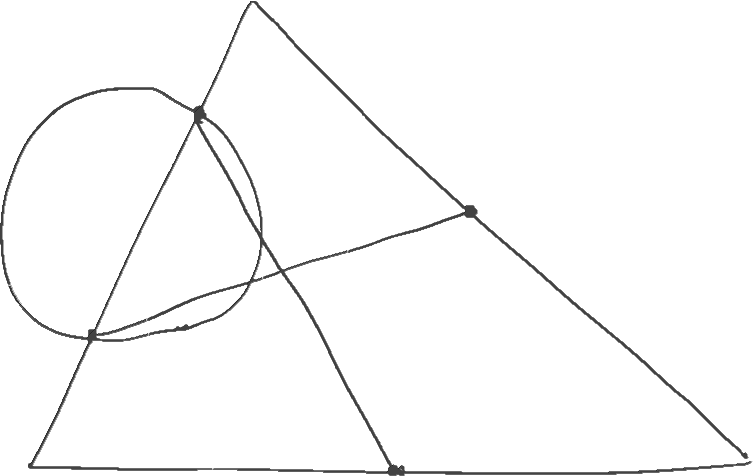

In [25]:
img_output, _ = run_asy_file("output.asy")
display(img_output)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-ucld1hvm/opencv/modules/imgproc/src/canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'
